# 1D J1-J2-J3: Result comparison (10000 samples)

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../utility')
numsamples = 10000

In [2]:
def Nt(N, Nv):
    Nt = []
    for (k,j) in zip(N,Nv):
        Nt.append(k)
        Nt.append(j)
    return Nt

In [7]:
def data_interval(data):
    data = {
       'x': data['x'],
        'y1': [y - e for y, e in zip(data['y'], data['yerr'])],
        'y2': [y + e for y, e in zip(data['y'], data['yerr'])]}
    return data

def plot_ax_errorbar(ax, df, j2j3, jv, E_e, ylim = False, yr=[0.5, 1.0]):
    x = np.arange(len(df.index))
    d_i = {'x': x, 'y': df[f'j_{j2j3}'], 'yerr': df[f'se_{j2j3}']}
    ax.bar(x,df[f'j_{j2j3}'], color = 'lightblue')
    ax.errorbar(**d_i, alpha=.75,  color = 'purple', fmt='x', ecolor = 'purple',
                      capsize=4, capthick=2, label= 'VMC')
   
    ax.axhline(E_e, color = 'red', label='DMRG')
    if ylim:
        ax.set_ylim(E_e-yr[0], E_e+yr[1])
    ax.set_xticks(range(len(x)), labels=names[:-1],
                  rotation=90, ha="right", rotation_mode="anchor")
    ax.set_title(f'$(J_2,J_3)$ = {(jv[0], jv[1])}', fontsize = 18)
    ax.set_ylabel('Mean energy', fontsize = 14)
    ax.xaxis.grid(True)
    ax.legend(loc='best')

## 1st set of experiments: Inference results

In [10]:
names = ['Euclidean GRU', 'Hyperbolic GRU', 'DMRG']
j_00_05 = [-11.3393,-15.0637, -15.8903]
j_00_05v = [0.54310, 1.7503, 0.0 ]
#2k samples
#j_00_05 = [-11.3533,-15.1049, -15.8903]
#j_00_05v = [1.5910, 1.6115, 0.0 ]

j_02_02 = [-10.7807,-11.9804,-12.9430]
j_02_02v = [2.2398, 2.1798, 0.0]
#2k samples
#j_02_02 = [-10.7846,-12.0337,-12.9430]
#j_02_02v = [1.7614, 1.4741, 0.0]

j_02_05 = [-9.9980,-12.7448,-14.6408]
j_02_05v = [5.8890,3.3861,0.0]
#2k samples
#j_02_05 = [-9.9553,-12.7041,-14.6408]
#j_02_05v = [5.9201,1.2632,0.0]

j_05_02 = [-9.6562,-10.7973,-11.5287]
j_05_02v = [1.9596,0.3061,0.0]
#2k samples
#j_05_02 = [-9.6420,-10.7962,-11.5287]
#j_05_02v = [1.8228,0.3465,0.0]

dd = {'names': names, 'j_00_05': j_00_05, 'j_00_05v': j_00_05v, 'j_02_02': j_02_02, 'j_02_02v': j_02_02v,
                      'j_02_05': j_02_05, 'j_02_05v': j_02_05v,'j_05_02': j_05_02, 'j_05_02v': j_05_02v}
df = pd.DataFrame(dd)
df

,names,j_00_05,j_00_05v,j_02_02,j_02_02v,j_02_05,j_02_05v,j_05_02,j_05_02v
0,Euclidean GRU,-11.3393,0.5431,-10.7807,2.2398,-9.9980,5.8890,-9.6562,1.9596
1,Hyperbolic GRU,-15.0637,1.7503,-11.9804,2.1798,-12.7448,3.3861,-10.7973,0.3061
2,DMRG,-15.8903,0.0000,-12.9430,0.0000,-14.6408,0.0000,-11.5287,0.0000


In [11]:
df=pd.DataFrame(dd)
df['se_00_05'] = df['j_00_05v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df['se_02_02'] = df['j_02_02v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df['se_02_05'] = df['j_02_05v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df['se_05_02'] = df['j_05_02v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df.set_index('names', inplace = True)
df.drop(['j_00_05v', 'j_02_02v', 'j_02_05v', 'j_05_02v'], axis = 1, inplace = True)
#df2 = df[:2]
df

,j_00_05,j_02_02,j_02_05,j_05_02,se_00_05,se_02_02,se_02_05,se_05_02
names,,,,,,,,
Euclidean GRU,-11.3393,-10.7807,-9.9980,-9.6562,0.007,0.015,0.024,0.014
Hyperbolic GRU,-15.0637,-11.9804,-12.7448,-10.7973,0.013,0.015,0.018,0.006
DMRG,-15.8903,-12.9430,-14.6408,-11.5287,0.000,0.000,0.000,0.000


In [12]:
names2 = ['Euclidean GRU', '__', 'Hyperbolic GRU', '__','DMRG', '__']
dd2 = {'names': names2, 'j_00_05': Nt(j_00_05, df['se_00_05']), 'j_02_02': Nt(j_02_02,  df['se_02_02']),
                      'j_02_05': Nt(j_02_05, df['se_02_05']),'j_05_02': Nt(j_05_02, df['se_05_02'])}
df2 = pd.DataFrame(dd2).set_index('names')
df2

,j_00_05,j_02_02,j_02_05,j_05_02
names,,,,
Euclidean GRU,-11.3393,-10.7807,-9.9980,-9.6562
__,0.0070,0.0150,0.0240,0.0140
Hyperbolic GRU,-15.0637,-11.9804,-12.7448,-10.7973
__,0.0130,0.0150,0.0180,0.0060
DMRG,-15.8903,-12.9430,-14.6408,-11.5287
__,0.0000,0.0000,0.0000,0.0000


## Comparisons

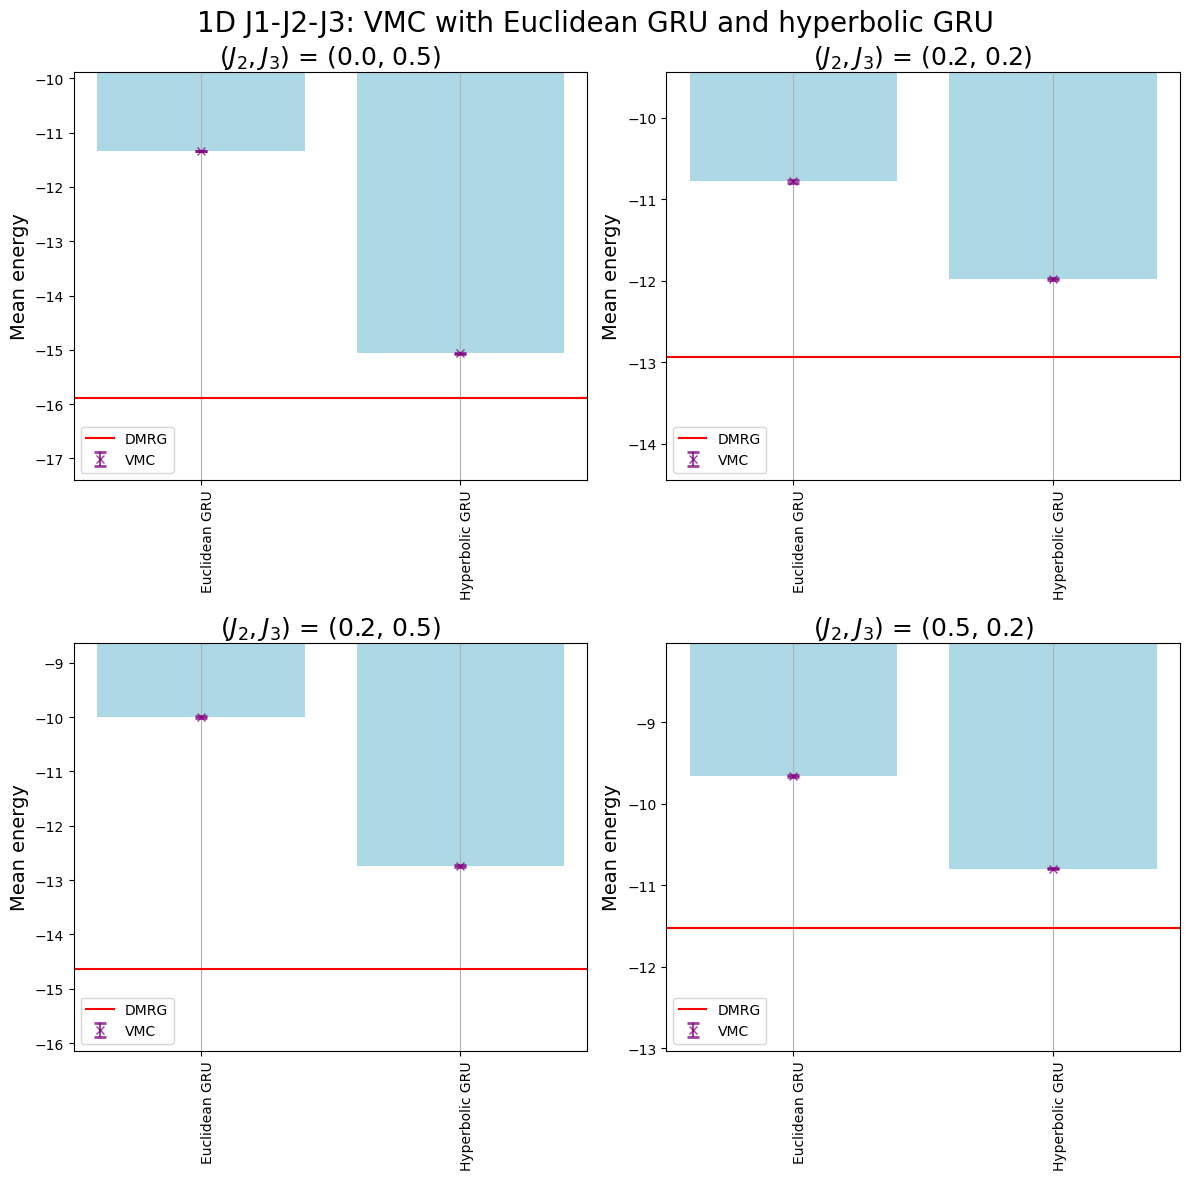

In [14]:
df = df[:2]
fig, ax = plt.subplots(2,2, figsize = (12,12), tight_layout = True)
plot_ax_errorbar(ax[0,0], df, '00_05', [0.0, 0.5], -15.89028, ylim = True, yr= [1.5, 6.0])
plot_ax_errorbar(ax[0,1], df, '02_02', [0.2, 0.2], -12.9430, ylim = True, yr=[1.5, 3.5])
plot_ax_errorbar(ax[1,0], df, '02_05', [0.2, 0.5], -14.64083, ylim =True, yr= [1.5, 6.0])
plot_ax_errorbar(ax[1,1], df, '05_02', [0.5, 0.2], -11.52874, ylim =True,  yr= [1.5, 3.5])
fig.suptitle('1D J1-J2-J3: VMC with Euclidean GRU and hyperbolic GRU', fontsize = 20)
plt.savefig('1d_j1j2j3_comparison_10k.png')

## 2nd set of experiments:

In the 2nd set of VMC experiments, only 2 cases are of interest: $(J_2, J_3) = (0.2, 0.5)$ and $(J_2, J_3) = (0.5, 0.2)$. Only 1 variant of Euclidean GRU ansatz was used: eGRU-60-s50, while various hyperbolic GRU ansatzes with different $ 53\leq d_h < 60$ were used, and the best one chosen to compare against Euclidean GRU. In this inference notebook, only the best results are included. 
- $(J_2, J_3) = (0.2, 0.5)$: Best hyperbolic GRU variant is hGRU-55-s50
- $(J_2, J_3) = (0.5, 0.2)$: Best hyperbolic GRU variant is hGRU-57-s50
  
The number of samples used for estimation here is 10000. 

In [3]:
names = ['Euclidean GRU', 'Hyperbolic GRU', 'DMRG']
j_02_05 = [-14.5846, -14.5813, -14.6408]
j_02_05v = [0.9665, 1.1208,0.0]
#2k samples (no gc)
#j_02_05 = [-14.6039, -14.3426, -14.6408]
#j_02_05v = [0.7987, 1.6583,0.0]

j_05_02 = [-11.3073, -11.3322, -11.5287]
j_05_02v = [0.3119,0.20268,0.0]
#2k samples
#j_05_02 = [-11.3120, -11.2885, -11.5287]
#j_05_02v = [0.3043,0.2692,0.0]

dd3 = {'names': names, 'j_02_05': j_02_05, 'j_02_05v': j_02_05v,'j_05_02': j_05_02, 'j_05_02v': j_05_02v}
df3 = pd.DataFrame(dd3)

df3['se_02_05'] = df3['j_02_05v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df3['se_05_02'] = df3['j_05_02v'].apply(lambda x: np.round(np.sqrt(x/numsamples),3))
df3.set_index('names', inplace = True)
df3.drop(['j_02_05v', 'j_05_02v'], axis = 1, inplace = True)

df3

,j_02_05,j_05_02,se_02_05,se_05_02
names,,,,
Euclidean GRU,-14.5846,-11.3073,0.010,0.006
Hyperbolic GRU,-14.5813,-11.3322,0.011,0.005
DMRG,-14.6408,-11.5287,0.000,0.000


In [4]:
names2 = ['Euclidean GRU', '__', 'Hyperbolic GRU', '__','DMRG', '__']
dd4 = {'names': names2,'j_02_05': Nt(j_02_05, df3['se_02_05']),'j_05_02': Nt(j_05_02, df3['se_05_02'])}
df4 = pd.DataFrame(dd4).set_index('names')
df4

,j_02_05,j_05_02
names,,
Euclidean GRU,-14.5846,-11.3073
__,0.0100,0.0060
Hyperbolic GRU,-14.5813,-11.3322
__,0.0110,0.0050
DMRG,-14.6408,-11.5287
__,0.0000,0.0000


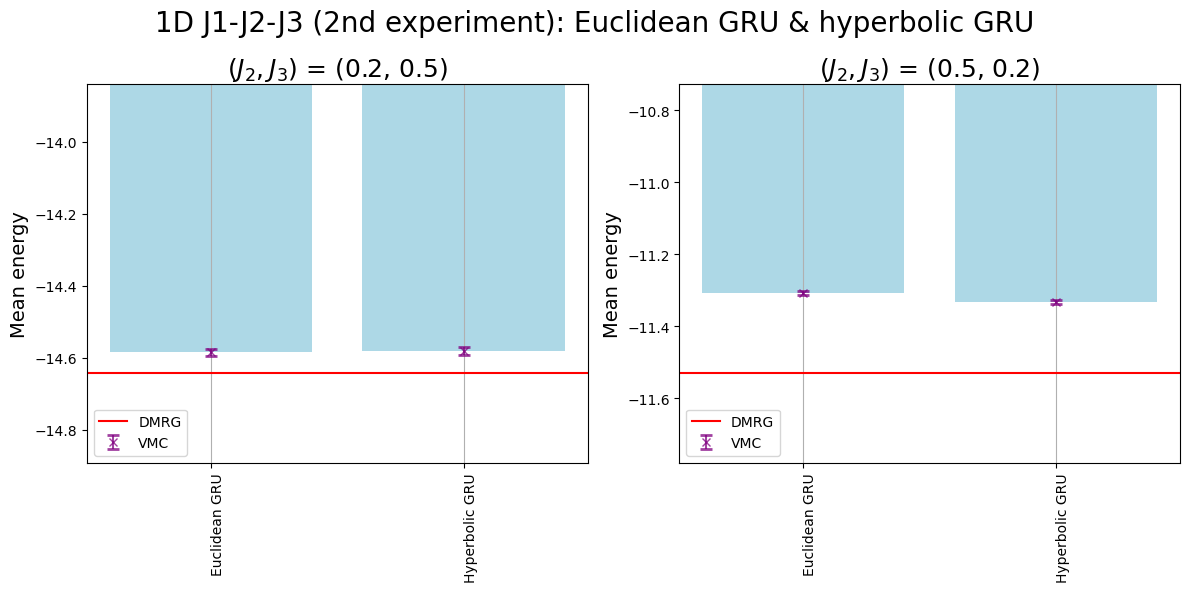

In [8]:
df3 = df3[:2]
fig, ax = plt.subplots(1,2, figsize = (12,6), tight_layout = True)
plot_ax_errorbar(ax[0], df3, '02_05', [0.2, 0.5], -14.64083, ylim =True, yr= [0.25, 0.8])
plot_ax_errorbar(ax[1], df3, '05_02', [0.5, 0.2], -11.52874, ylim =True,  yr= [0.25, 0.8])
fig.suptitle('1D J1-J2-J3 (2nd experiment): Euclidean GRU & hyperbolic GRU', fontsize = 20)
plt.savefig('1d_j1j2j3_comparison_2nd_set_10k.png')